In [1]:
import sys
!{sys.executable} -m pip freeze > requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import sklearn.datasets
import sklearn.linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


In [3]:
California_housing_df = pd.read_csv('housing.csv')
California_housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
California_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The above table shows the individual features and their data type. The table also shows the number of non-null values/observations for each feature. Upon careful analysis of the table, there are two features that caught the attention:

The feature called 'total_bedrooms' has some missing values because its total number of observation is 20433.

The data type of the feature, 'ocean_proximity' is an object which is not a numerical value.

In [5]:
California_housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The above table gives statistical information about the individual features excluding 'ocean_proximity' because it is a categorical feature. The table shows that 'total_rooms' consist of a maximum value of 39320 but however its third quartile value is 3148. This means the feature consists of some outliers as the maximum value is exponentially high. Due to this reason, Normalization is not suitable for feature scaling. In order to visualize this information, a histogram is plotted.  

In [6]:

features = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity']
X_raw = California_housing_df[features]
y_raw = California_housing_df['median_house_value']

In [7]:
display(X_raw.select_dtypes(include=np.number).describe())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [8]:
display(X_raw.select_dtypes(exclude=np.number).describe())

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [9]:
print(pd.unique(X_raw['ocean_proximity']))

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

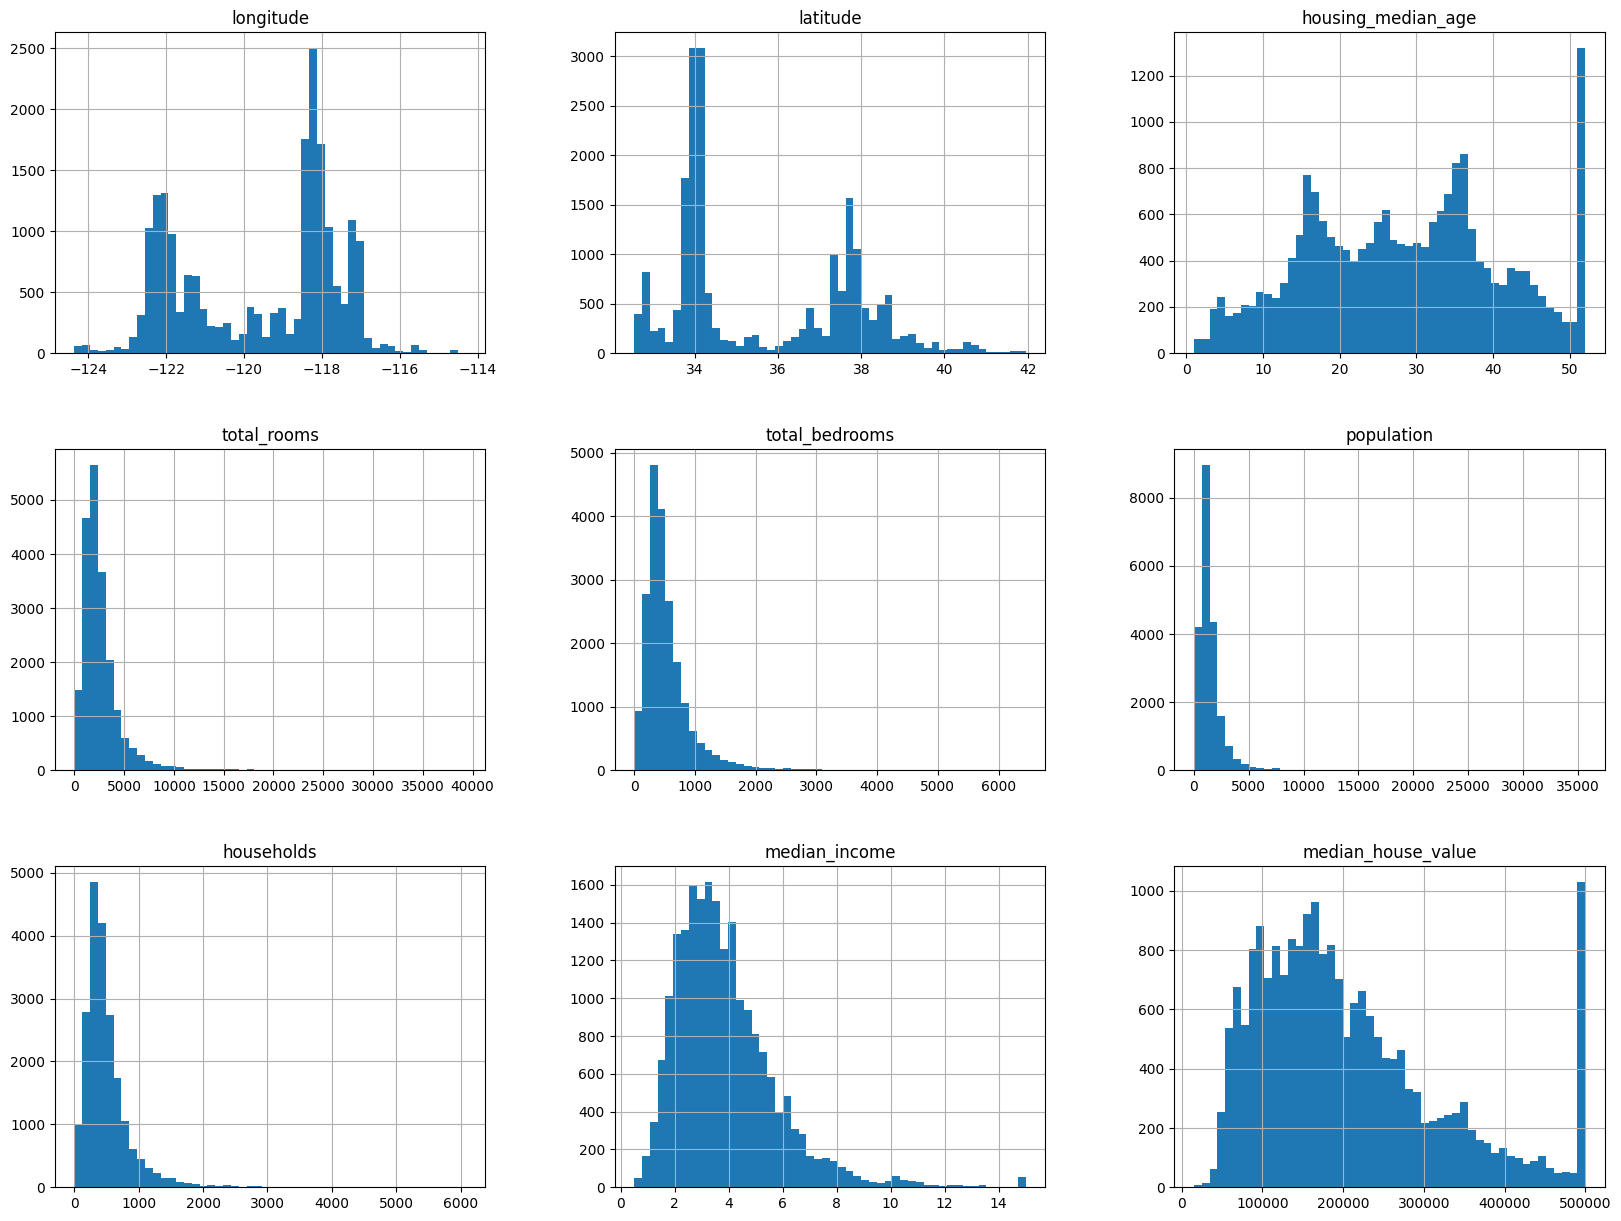

In [10]:
California_housing_df.hist(bins= 50, figsize=(20,15))

The histogram shows that the features 'median_house_value' and 'housing_median_age' consists of some outlier as there is a negative skewness in both features which means that are some values that are exponentially higher than others. 

In [11]:
California_housing_df['ocean_proximity'].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [12]:
corr_matrix = California_housing_df.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Exploratory Data Analysis

In [13]:
features= ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity']
X_raw = California_housing_df[features]
y_raw = California_housing_df['median_house_value']

In [14]:
X_raw

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [15]:
print(X_raw.shape)

(20640, 9)


Splitting the dataset into train and test set. 

In [16]:
#X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.20, shuffle=True, random_state=0)

Preprocessing

For preprocessing, The numerical features and categorical features needs to be seperated.

For the missing values in the numerical features, SimpleImputer is used which fills the null values with mean of that feature. In this case, The null values of 'total_bedrooms' will be replace with the mean value of itself. Note: Median can also be used. 

degree: 1, Test mean squared error:4719210018.365488.
degree: 2, Test mean squared error:4051638439.056801.
degree: 3, Test mean squared error:4172274701.7627125.
degree: 4, Test mean squared error:6610997423.804137.
degree: 5, Test mean squared error:579708866154.5077.


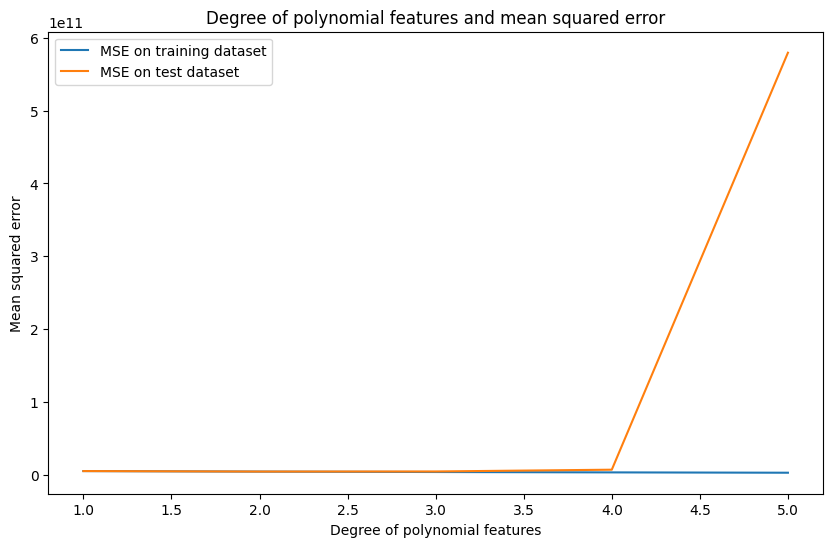

The best degree of polynomials: 2


In [17]:


X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.20, shuffle=True, random_state=0)

X_train_num = X_train_raw.select_dtypes(include=np.number)
X_train_cat = X_train_raw.select_dtypes(exclude=np.number)

numeric_imputer = SimpleImputer(strategy='median')
# Fit the imputers on the training data
numeric_imputer.fit(X_train_num)

# Transform the columns
# Training
X_train_num_imp = numeric_imputer.transform(X_train_num)

#Splitting and transforming the test data
X_test_num = X_test_raw.select_dtypes(include=np.number)
X_test_cat = X_test_raw.select_dtypes(exclude=np.number)
X_test_num_imp = numeric_imputer.transform(X_test_num)



scaler= StandardScaler()
scaler.fit(X_train_num_imp)
#print(f'mean = \n{scaler.mean_}, \nvar = \n{scaler.var_}') # print the calculated mean and variance for each attribute
#X_train_num_sca = scaler.transform(X_train_num_imp) # standardize X_train
#print(f'mean = \n{np.mean(X_train_num_sca, axis=0)}, \nvar = \n{np.var(X_train_num_sca, axis=0)}') # verify that X_train_stded has mean 0 (mean isn't quite 0 due to numerical error, but is a miniscule value) and variance 1.

X_test_num_sca = scaler.transform(X_test_num_imp)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# Fit encoder on the training data
encoder.fit(X_train_cat)

# Transform the test and train data
X_train_onehot = encoder.transform(X_train_cat)
X_test_onehot = encoder.transform(X_test_cat)

max_degree = 5 #Define the max degree to test
# Initialise the MSE arrays, filling them with NaN's
mse_train_array = np.full([max_degree + 1], np.nan)
mse_test_array = np.full([max_degree + 1], np.nan)
degrees = range(1, max_degree+1) # create list of degree values being iterated through

for degree in degrees:

  # Initialise
  lm = LinearRegression()
  poly = PolynomialFeatures(degree=degree, interaction_only=False)
  scaler = StandardScaler()
  # Train
  poly.fit(X_train_num_imp)
  X_train_poly = poly.fit_transform(X_train_num_imp) # Fit and transform the poly object to the training data to make a new feature matrix
  scaler.fit(X_train_poly)
  X_train_num_sca = scaler.transform(X_train_poly)
  X_train = np.concatenate([X_train_num_sca, X_train_onehot], axis=1)
  lm.fit(X_train, y_train)
  y_pred_train = lm.predict(X_train)
  mse_train = mean_squared_error(y_train, y_pred_train)

  #test
  X_test_poly = poly.transform(X_test_num_imp)
  X_test_num_sca = scaler.transform(X_test_poly)
  X_test = np.concatenate([X_test_num_sca, X_test_onehot], axis=1)
  y_pred_test = lm.predict(X_test)
  mse_test = mean_squared_error(y_test, y_pred_test)

  # Store MSE for this degree value
  mse_train_array[degree] = mse_train
  mse_test_array[degree] =mse_test


  print(f'degree: {degree}, Test mean squared error:{mse_test}.')

plt.figure(figsize=(10,6))
plt.plot(degrees, mse_train_array[1:], label='MSE on training dataset')
plt.plot(degrees, mse_test_array[1:], label='MSE on test dataset')
plt.xlabel('Degree of polynomial features')
plt.ylabel('Mean squared error')
plt.title('Degree of polynomial features and mean squared error')
plt.legend()
plt.show()

best_degree = np.nanargmin(mse_test_array) # Finds the smallest training MSE in the array (ignoring any NaN values).
print('The best degree of polynomials:', best_degree)

In [18]:
#Let's consider a univariate linear regression model with a single feature, 'median_income'
#median_income = MSE: 6848804310.6727 R2 score: 0.4051
#all features except ocean_proximityMSE: 4709635930.1480 R2 score: 0.5909
#ALL FEATURES(THE BEST) =MSE: 4493202726.5960 R2 score: 0.6097
#ALL FEATURES WITH POLYNOMIAL DEGREE -2 = MSE: 3955465362.8644 R2 score: 0.6564

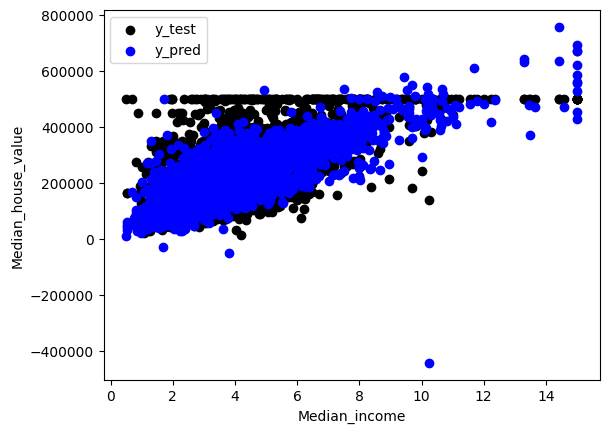

Train - MSE: 3983232936.1829 R2 score: 0.7024
Test - MSE: 4051638439.0568 R2 score: 0.6893


In [19]:

# Preprocessing

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.20, shuffle=True, random_state=0)

# To apply the different imputers, we first have to split our data into seperate numerical and categorical data
X_train_num = X_train_raw.select_dtypes(include=np.number)
X_train_cat = X_train_raw.select_dtypes(exclude=np.number)

# Create our imputer objects
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy = 'most_frequent')

# Fit the imputers on the training data
numeric_imputer.fit(X_train_num)
categorical_imputer.fit(X_train_cat)


# Transform the columns
# Training
X_train_num_imp = numeric_imputer.transform(X_train_num)
X_train_cat_imp = categorical_imputer.transform(X_train_cat)
#Splitting and transforming the test data
X_test_num = X_test_raw.select_dtypes(include=np.number)
X_test_cat = X_test_raw.select_dtypes(exclude=np.number)
X_test_num_imp = numeric_imputer.transform(X_test_num)
X_test_cat_imp =categorical_imputer.transform(X_test_cat)

#Hyperparameter tuning
degree = best_degree #choosing to add a second degree of polynomial which is considered as a hyperparameter
poly = PolynomialFeatures(degree, include_bias=False) # Create the polynomial features object
poly.fit(X_train_num_imp)
X_train_poly = poly.fit_transform(X_train_num_imp) # Fit and transform the poly object to the training data to make a new feature matrix
X_test_poly = poly.fit_transform(X_test_num_imp)

# Scaler Object
scaler = StandardScaler()
# Fit on the numeric training data
scaler.fit(X_train_poly)
# Transform the training and test data
X_train_num_sca = scaler.transform(X_train_poly)
X_test_num_sca = scaler.transform(X_test_poly)

#OneHotEncoder
# create the encoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# Fit encoder on teh training data
encoder.fit(X_train_cat_imp)
# Transform the test and train data
X_train_onehot = encoder.transform(X_train_cat_imp)
X_test_onehot = encoder.transform(X_test_cat_imp)

X_train = np.concatenate([X_train_num_sca, X_train_onehot], axis=1)
X_test = np.concatenate([X_test_num_sca, X_test_onehot], axis=1)


# End preprocessing


# Create linear regression object
lm = sklearn.linear_model.LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

# We can make a prediction with the training data
y_pred_train = lm.predict(X_train)

# Making predictions using the testing set
y_pred = lm.predict(X_test)


X_disp = X_test_raw.iloc[:, 7]  # We have to choose a single column of the feature matrix so we can plot a 2D scatter plot. X_test_raw is selected instead of X_test because after feature scaling, median_income will have a negative value.

# Plot outputs
plt.scatter(X_disp, y_test,  color='black', label='y_test') # Observed y values
plt.scatter(X_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('Median_income')
plt.ylabel('Median_house_value')
plt.legend()
#plt.xlim(0, 3)
plt.show()

lm_mse_train=sklearn.metrics.mean_squared_error(y_train, y_pred_train)
lm_r2_train=sklearn.metrics.r2_score(y_train, y_pred_train)
lm_mse_test = sklearn.metrics.mean_squared_error(y_test, y_pred)
lm_r2_test = sklearn.metrics.r2_score(y_test, y_pred)

# The mean squared error loss and R2 for the test and train data
print('Train - MSE: {:.4f} R2 score: {:.4f}'.format(lm_mse_train,lm_r2_train))
print('Test - MSE: {:.4f} R2 score: {:.4f}'.format(lm_mse_test,lm_r2_test))


alpha: 0, Testing mean squared error: 4063422740.6681204.
alpha: 1, Testing mean squared error: 4253086566.1326694.
alpha: 2, Testing mean squared error: 4288426386.7767997.
alpha: 3, Testing mean squared error: 4306459314.822161.
alpha: 4, Testing mean squared error: 4318043499.182285.
alpha: 5, Testing mean squared error: 4326269651.740932.
alpha: 6, Testing mean squared error: 4332451908.203456.
alpha: 7, Testing mean squared error: 4337273575.952413.
alpha: 8, Testing mean squared error: 4341135065.947266.
alpha: 9, Testing mean squared error: 4344290288.359946.
alpha: 10, Testing mean squared error: 4346909559.0169325.
alpha: 11, Testing mean squared error: 4349112051.143007.
alpha: 12, Testing mean squared error: 4350983959.888384.
alpha: 13, Testing mean squared error: 4352589320.604448.
alpha: 14, Testing mean squared error: 4353976774.1976385.
alpha: 15, Testing mean squared error: 4355183968.286547.
alpha: 16, Testing mean squared error: 4356240515.398843.
alpha: 17, Testing 

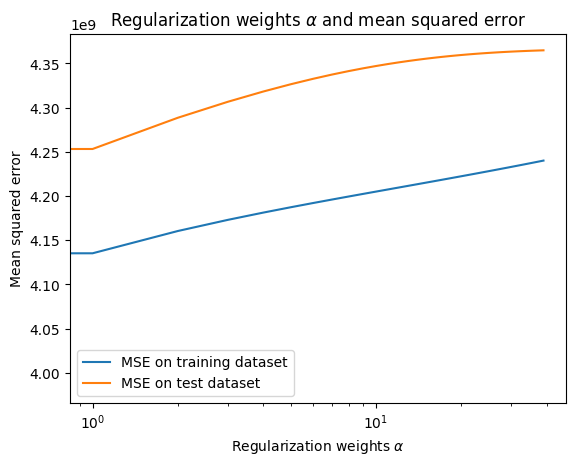

The best alpha: 0


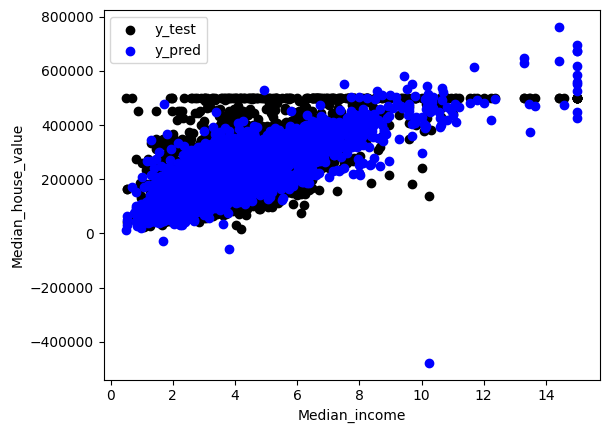

Train - MSE: 3984703540.2977 R2 score: 0.7023
Test - MSE: 4063422740.6681 R2 score: 0.6884


In [20]:

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.20, shuffle=True, random_state=0)

X_train_num = X_train_raw.select_dtypes(include=np.number)
X_train_cat = X_train_raw.select_dtypes(exclude=np.number)

numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy = 'most_frequent')

numeric_imputer.fit(X_train_num)
categorical_imputer.fit(X_train_cat)

# Fit the imputers on the training data
X_train_num_imp = numeric_imputer.transform(X_train_num)
X_train_cat_imp = categorical_imputer.transform(X_train_cat)

X_test_num = X_test_raw.select_dtypes(include=np.number)
X_test_cat = X_test_raw.select_dtypes(exclude=np.number)
X_test_num_imp = numeric_imputer.transform(X_test_num)
X_test_cat_imp =categorical_imputer.transform(X_test_cat)

degree = 2 # Choose your degree. Regularisation will eliminate any values that hurt our model
alpha_indices = np.arange(40)
alphas = alpha_indices # Define a list of alphas by taking indices from -1 to -15
# Get the MSE arrays
mse_train_array = np.full([len(alphas)], np.nan)
mse_test_array = np.full([len(alphas)], np.nan)

poly = PolynomialFeatures(degree=degree)
scaler = StandardScaler()

poly.fit(X_train_num_imp)
X_train_poly = poly.fit_transform(X_train_num_imp) # Fit and transform the poly object to the training data to make a new feature matrix
scaler.fit(X_train_poly)
X_train_num_sca = scaler.transform(X_train_poly)

X_test_poly = poly.transform(X_test_num_imp)
X_test_num_sca = scaler.transform(X_test_poly)


#OneHotEncoder
# create the encoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# Fit encoder on teh training data
encoder.fit(X_train_cat_imp)
# Transform the test and train data
X_train_onehot = encoder.transform(X_train_cat_imp)
X_test_onehot = encoder.transform(X_test_cat_imp)

X_train = np.concatenate([X_train_num_sca, X_train_onehot], axis=1)
X_test = np.concatenate([X_test_num_sca, X_test_onehot], axis=1)

for alpha_index, alpha in zip(alpha_indices, alphas):
  # train
  ridge = Ridge(alpha=alpha) # fits our ridge model with a new regularisation weight each iteration
  ridge.fit(X_train, y_train)
  y_pred_train = ridge.predict(X_train)
  mse_train = mean_squared_error(y_train, y_pred_train)

  # Validation
  y_pred_test = ridge.predict(X_test)
  mse_test = mean_squared_error(y_test, y_pred_test)

  # Store MSEs for this iteration
  mse_train_array[alpha_index] = mse_train
  mse_test_array[alpha_index] = mse_test
  print(f'alpha: {alpha}, Testing mean squared error: {mse_test}.')


plt.plot(alphas, mse_train_array, label='MSE on training dataset')
plt.plot(alphas, mse_test_array, label='MSE on test dataset')
plt.xlabel(r'Regularization weights $\alpha$')
plt.ylabel('Mean squared error')
plt.title(r'Regularization weights $\alpha$ and mean squared error')
plt.xscale('log')
plt.legend()
plt.show()

# Select our best performing alpha (lowest MSE)
best_alpha_index = np.argmin(mse_test_array)
best_alpha = alphas[best_alpha_index]
print('The best alpha:', best_alpha)

ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)

y_pred_train = ridge.predict(X_train)

y_pred = ridge.predict(X_test)

X_disp = X_test_raw.iloc[:, 7]

plt.scatter(X_disp, y_test,  color='black', label='y_test') # Observed y values
plt.scatter(X_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('Median_income')
plt.ylabel('Median_house_value')
plt.legend()
plt.show()


ridge_mse_train=sklearn.metrics.mean_squared_error(y_train, y_pred_train)
ridge_r2_train=sklearn.metrics.r2_score(y_train, y_pred_train)
ridge_mse_test = sklearn.metrics.mean_squared_error(y_test, y_pred)
ridge_r2_test = sklearn.metrics.r2_score(y_test, y_pred)


print('Train - MSE: {:.4f} R2 score: {:.4f}'.format(ridge_mse_train,ridge_r2_train))
print('Test - MSE: {:.4f} R2 score: {:.4f}'.format(ridge_mse_test,ridge_r2_test))

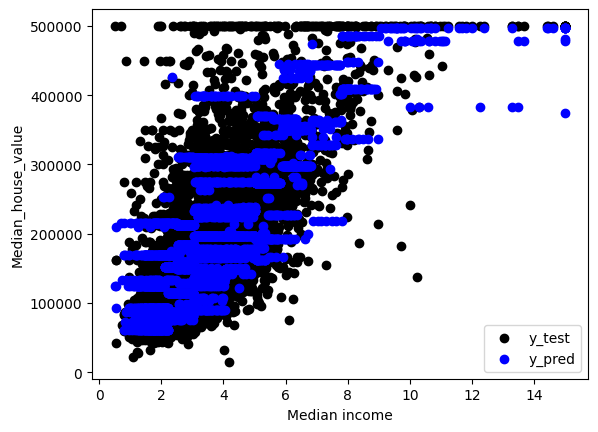

Train - MSE: 3784249718.9984 R2 score: 0.7172
Test - MSE: 4262577810.1326 R2 score: 0.6731


In [21]:


features = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity']
X_raw_features = X_raw[features]

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw_features, y_raw, test_size=0.20, shuffle=True, random_state=0)

# To apply the different imputers, we first have to split our data into seperate numerical and categorical data
X_train_num = X_train_raw.select_dtypes(include=np.number)
X_train_cat = X_train_raw.select_dtypes(exclude=np.number)

# Create our imputer objects
numeric_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputers on the training data
numeric_imputer.fit(X_train_num)
cat_imputer.fit(X_train_cat)

# Transform the columns
# Training
X_train_num_imp = numeric_imputer.transform(X_train_num)
X_train_cat_imp = cat_imputer.transform(X_train_cat)


X_test_num = X_test_raw.select_dtypes(include=np.number)
X_test_cat = X_test_raw.select_dtypes(exclude=np.number)
X_test_num_imp = numeric_imputer.transform(X_test_num)
X_test_cat_imp = cat_imputer.transform(X_test_cat)


# Scaler Object
scaler = StandardScaler()
# Fit on the numeric training data
scaler.fit(X_train_num_imp)
# Transform the training and test data
X_train_num_sca = scaler.transform(X_train_num_imp)
X_test_num_sca = scaler.transform(X_test_num_imp)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# Fit encoder on teh training data
encoder.fit(X_train_cat_imp)
# Transform the test and train data
X_train_onehot = encoder.transform(X_train_cat_imp)
X_test_onehot = encoder.transform(X_test_cat_imp)

#combine the categorical and numerical features together

X_train = np.concatenate([X_train_num_sca, X_train_onehot], axis=1)
X_test = np.concatenate([X_test_num_sca, X_test_onehot], axis=1)


tree = DecisionTreeRegressor(
 max_depth= 7,
 min_samples_split= 5,
 min_samples_leaf=5)


# Train the model using the training sets
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)

y_pred = tree.predict(X_test)

X_disp = X_test_raw.iloc[:, 7]

plt.scatter(X_disp, y_test,  color='black', label='y_test') # Observed y values
plt.scatter(X_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('Median income')
plt.ylabel('Median_house_value')
plt.legend()
plt.show()

tree_mse_train = sklearn.metrics.mean_squared_error(y_train, y_pred_train)
tree_r2_train =sklearn.metrics.r2_score(y_train, y_pred_train)
tree_mse_test = sklearn.metrics.mean_squared_error(y_test, y_pred)
tree_r2_test = sklearn.metrics.r2_score(y_test, y_pred)
print('Train - MSE: {:.4f} R2 score: {:.4f}'.format(tree_mse_train ,tree_r2_train))
print('Test - MSE: {:.4f} R2 score: {:.4f}'.format(tree_mse_test,tree_r2_test))


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


C:\Users\zaced\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
720 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
616 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\zaced\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zaced\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\zaced\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py

Best Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 12, 'min_samples_split': 10}


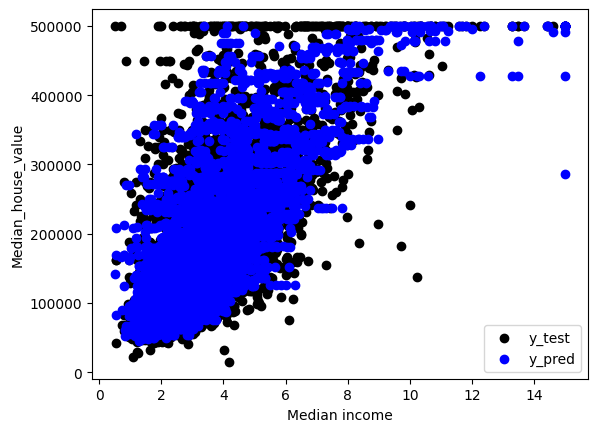

Train - MSE: 3784249718.9984 R2 score: 0.7172
Test - MSE: 3124894422.1219 R2 score: 0.7604


In [22]:

# Define the Decision Tree regressor
tree = sklearn.tree.DecisionTreeRegressor()

# Define hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7, 10,12, None],
    'min_samples_split': [2, 5, 10,20],
    'min_samples_leaf': [1, 2, 4,8,10,12],
    'max_features': ['auto', 'sqrt', 'log2',None]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)



X_disp = X_test_raw.iloc[:, 7]

plt.scatter(X_disp, y_test,  color='black', label='y_test') # Observed y values
plt.scatter(X_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('Median income')
plt.ylabel('Median_house_value')
plt.legend()
plt.show()

tree_mse_train = sklearn.metrics.mean_squared_error(y_train, y_pred_train)
tree_r2_train =sklearn.metrics.r2_score(y_train, y_pred_train)
tree_mse_test = sklearn.metrics.mean_squared_error(y_test, y_pred)
tree_r2_test = sklearn.metrics.r2_score(y_test, y_pred)
print('Train - MSE: {:.4f} R2 score: {:.4f}'.format(tree_mse_train ,tree_r2_train))
print('Test - MSE: {:.4f} R2 score: {:.4f}'.format(tree_mse_test,tree_r2_test))

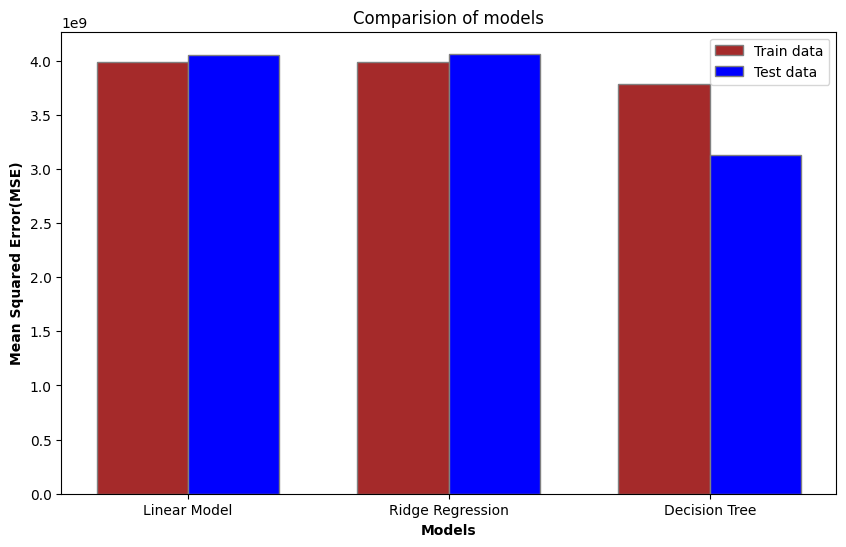

In [23]:

models = ['Linear Model', 'Ridge Regression', 'Decision Tree']

# MSE values for train and test data for each model
mse_train = [lm_mse_train, ridge_mse_train, tree_mse_train]
mse_test = [lm_mse_test, ridge_mse_test, tree_mse_test]

# Set the width of the bars
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 6))
plt.bar(r1, mse_train, color='brown', width=bar_width, edgecolor='grey', label='Train data')
plt.bar(r2, mse_test, color='blue', width=bar_width, edgecolor='grey', label='Test data')

# Adding labels
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Mean Squared Error(MSE)', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(models))], models)
plt.title('Comparision of models')
plt.legend()

plt.show()

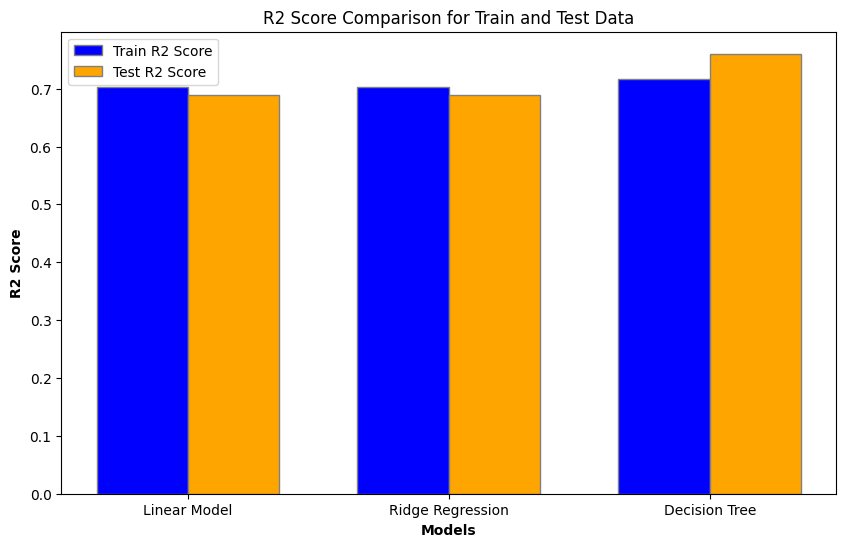

In [24]:
models = ['Linear Model', 'Ridge Regression', 'Decision Tree']

# R2 scores for train and test data for each model
r2_train = [lm_r2_train, ridge_r2_train, tree_r2_train]
r2_test = [lm_r2_test, ridge_r2_test,tree_r2_test]

# Set the width of the bars
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 6))
plt.bar(r1, r2_train, color='blue', width=bar_width, edgecolor='grey', label='Train R2 Score')
plt.bar(r2, r2_test, color='orange', width=bar_width, edgecolor='grey', label='Test R2 Score')

# Adding labels
plt.xlabel('Models', fontweight='bold')
plt.ylabel('R2 Score', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(models))], models)
plt.title('R2 Score Comparison for Train and Test Data')
plt.legend()

plt.show()